In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [2]:
data=pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx", header=0, index_col=0,parse_dates=True)

In [3]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


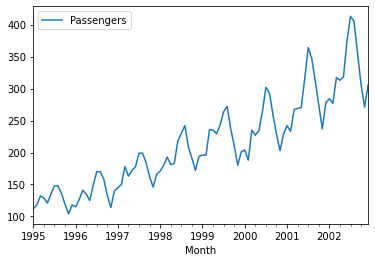

In [4]:
data.plot()
pyplot.show()

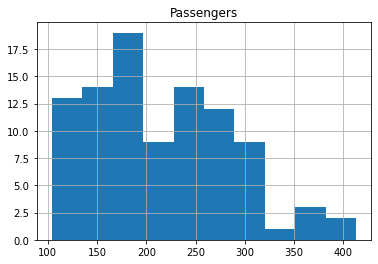

In [5]:
data.hist()
pyplot.show()

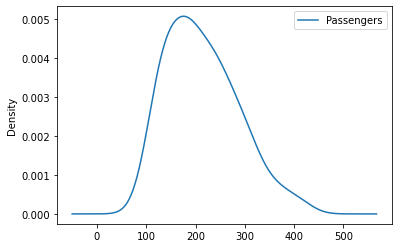

In [6]:
data.plot(kind='kde')
pyplot.show()

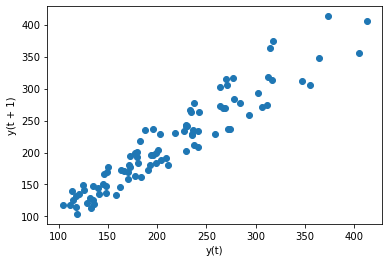

In [7]:
from pandas.plotting import lag_plot
lag_plot(data)
pyplot.show()

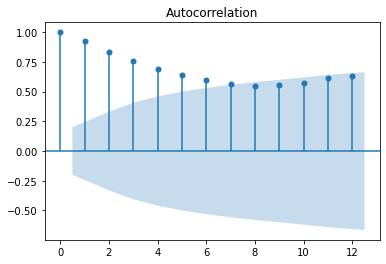

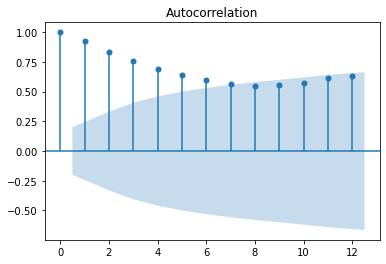

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data.Passengers,lags=12)
plot_acf(data.Passengers, lags=12)
plt.show()

### Upsampling

In [9]:
upsampled=data.resample('D').mean()
print(upsampled)

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
...                ...
2002-11-27         NaN
2002-11-28         NaN
2002-11-29         NaN
2002-11-30         NaN
2002-12-01       306.0

[2892 rows x 1 columns]


In [10]:
interpolated=upsampled.interpolate(method='linear')
print(interpolated)

            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
...                ...
2002-11-27  301.333333
2002-11-28  302.500000
2002-11-29  303.666667
2002-11-30  304.833333
2002-12-01  306.000000

[2892 rows x 1 columns]


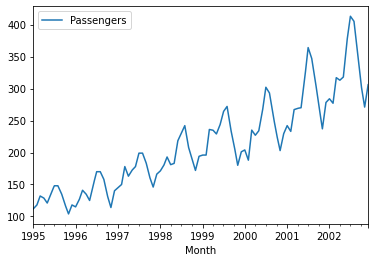

In [11]:
interpolated.plot()
pyplot.show()

### Down sampling

In [12]:
resample=data.resample('Q')
quarterly_mean_sample=resample.mean()
quarterly_mean_sample

,Passengers
Month,
1995-03-31,120.666667
1995-06-30,128.333333
1995-09-30,144.000000
1995-12-31,113.666667
1996-03-31,127.333333
1996-06-30,136.333333
1996-09-30,166.000000
1996-12-31,129.000000
1997-03-31,157.666667


## Transformations

In [13]:
import pandas as pd
data=pd.read_excel("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/Forecasting/Airlines%2BData.xlsx",header=0, index_col=0,parse_dates=True)

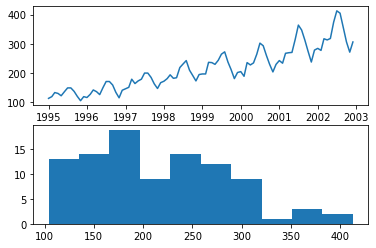

In [14]:
from matplotlib import pyplot
pyplot.subplot(211)
pyplot.plot(data)

pyplot.subplot(212)
pyplot.hist(data)
pyplot.show()

## Square root transform

In [15]:
from numpy import sqrt

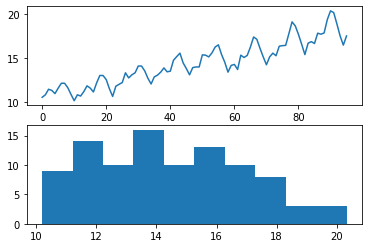

In [16]:
dataframe=pd.DataFrame(data.values)
dataframe.columns=['passengers']
dataframe['passengers']=sqrt(dataframe['passengers'])

pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

## Log transform

In [17]:
from numpy import log

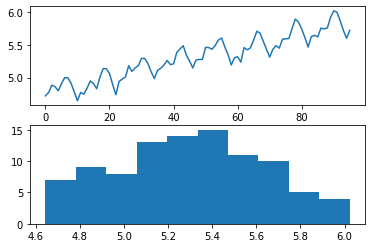

In [18]:
dataframe=pd.DataFrame(data.values)
dataframe.columns=['passengers']
dataframe['passengers']=log(dataframe['passengers'])

pyplot.subplot(211)
pyplot.plot(dataframe['passengers'])

pyplot.subplot(212)
pyplot.hist(dataframe['passengers'])
pyplot.show()

# Forecasting on diffarent models

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [20]:
data=pd.read_excel("C:/Users/prath/Airlines_Data.xlsx",header=0, index_col=0,parse_dates=True)
data

,Passengers,t,t_square
Month,,,
1995-01-01,112,1,1
1995-02-01,118,2,4
1995-03-01,132,3,9
1995-04-01,129,4,16
1995-05-01,121,5,25
...,...,...,...
2002-08-01,405,92,8464
2002-09-01,355,93,8649
2002-10-01,306,94,8836


In [21]:
data['log_Passengers'] = np.log2(data['Passengers'])

In [22]:
data.reset_index(level=0, inplace=True)

In [23]:
data['Month']=pd.to_datetime(data["Month"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Month           96 non-null     datetime64[ns]
 1   Passengers      96 non-null     int64         
 2   t               96 non-null     int64         
 3   t_square        96 non-null     int64         
 4   log_Passengers  96 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 3.9 KB


In [24]:
from pandas import datetime
import datetime as dt
data1=data["Month"].dt.month

<ipython-input-24-f169bfcdab63>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [25]:
months=data['Month'].dt.month_name(locale = 'English')

<ipython-input-25-e510ae597cb1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [26]:
df=pd.concat([data,months],axis=1)
df

,Month,Passengers,t,t_square,log_Passengers,Month
0,1995-01-01,112,1,1,6.807355,January
1,1995-02-01,118,2,4,6.882643,February
2,1995-03-01,132,3,9,7.044394,March
3,1995-04-01,129,4,16,7.011227,April
4,1995-05-01,121,5,25,6.918863,May
...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,8.661778,August
92,2002-09-01,355,93,8649,8.471675,September
93,2002-10-01,306,94,8836,8.257388,October
94,2002-11-01,271,95,9025,8.082149,November


In [27]:
months_dummies=pd.get_dummies(months)
months_dummies

,April,August,December,February,January,July,June,March,May,November,October,September
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0
94,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
df1=pd.concat([df, months_dummies], axis=1)
df1

,Month,Passengers,t,t_square,log_Passengers,Month,April,August,December,February,January,July,June,March,May,November,October,September
0,1995-01-01,112,1,1,6.807355,January,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,2,4,6.882643,February,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,3,9,7.044394,March,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,4,16,7.011227,April,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,5,25,6.918863,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,92,8464,8.661778,August,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,93,8649,8.471675,September,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,94,8836,8.257388,October,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,95,9025,8.082149,November,0,0,0,0,0,0,0,0,0,1,0,0


In [29]:
data['month'] = data['Month'].dt.month
data['year'] = data['Month'].dt.year
data['day'] = data['Month'].dt.day 

<AxesSubplot:xlabel='month', ylabel='year'>

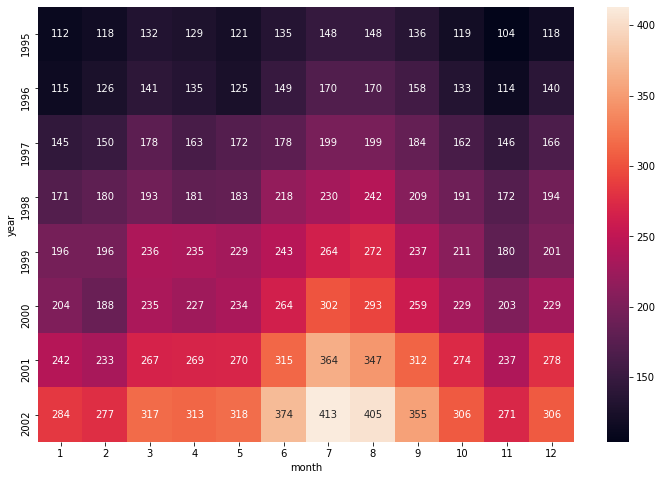

In [30]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

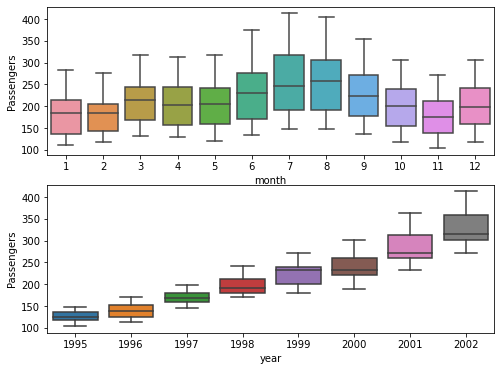

In [31]:
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=data)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

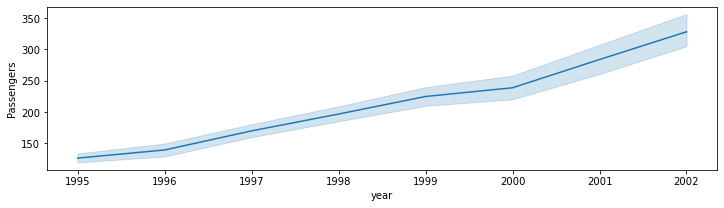

In [39]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

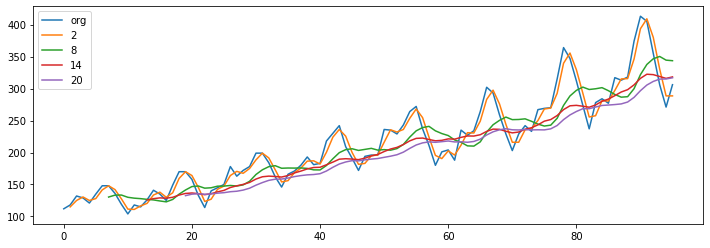

In [32]:
plt.figure(figsize=(12,4))
df1.Passengers.plot(label="org")
for i in range(2,24,6):
    df1["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

In [62]:
Train=df1.head(90)
Test=df1.tail(6)

In [63]:
import statsmodels.formula.api as smf

### Linear model

In [64]:
linear_model=smf.ols('Passengers~t',data=Train).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

64.13398871447579

### Exponential model

In [65]:
exp=smf.ols('log_Passengers~t',data=Train).fit()
pred_exp=pd.Series(exp.predict(Test['t']))
rmse_exp=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

4020.499793676191

### Quadratic model

In [66]:
qud=smf.ols('Passengers~t_square',data=Train).fit()
pred_qud=pd.Series(qud.predict(Test[["t","t_square"]]))
rmse_qud=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_qud))**2))
rmse_qud

59.984048630508106

### Additive seasonality

In [68]:
add_sea=smf.ols('Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea=pd.Series(add_sea.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

139.25284105359074

### Additive seasonality quadratic

In [70]:
add_sea_qud=smf.ols('Passengers~t+t_square+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_qud=pd.Series(add_sea_qud.predict(Test[['t','t_square','January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_sea_qud=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_qud))**2))
rmse_add_sea_qud

29.678976914614545

### Multiplicative seasonality

In [72]:
mul_sea=smf.ols('log_Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_mul_sea=pd.Series(mul_sea.predict(Test))
rmse_mul_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_sea)))**2))
rmse_mul_sea

1759.7526596074142

### Multiplicative additive seasonality

In [73]:
mul_add_sea=smf.ols('log_Passengers~t+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_mul_add_sea=pd.Series(mul_add_sea.predict(Test))
rmse_mul_add_sea=np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mul_add_sea)))**2))
rmse_mul_add_sea

4228.4212920978935

## Comparing the models

In [75]:
result={"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_qud","rmse_add_sea","rmse_add_sea_qud","rmse_mul_sea","rmse_mul_add_sea"]),"RMSE_values":pd.Series([rmse_linear,rmse_exp,rmse_qud,rmse_add_sea,rmse_add_sea_qud,rmse_mul_sea,rmse_mul_add_sea])}
table_rmse=pd.DataFrame(result)
table_rmse.sort_values(['RMSE_values'])

,MODEL,RMSE_values
4,rmse_add_sea_qud,29.678977
2,rmse_qud,59.984049
0,rmse_linear,64.133989
3,rmse_add_sea,139.252841
5,rmse_mul_sea,1759.752660
1,rmse_exp,4020.499794
6,rmse_mul_add_sea,4228.421292


In [76]:
model_full=smf.ols('Passengers~t+t_square+January+February+March+April+May+June+July+August+September+October+November+December',data=df1).fit()
pred_new=pd.Series(add_sea_qud.predict(df1))
pred_new

0     101.341463
1     100.380845
2     128.420227
3     121.709609
4     120.873991
         ...    
91    362.357371
92    338.169506
93    313.981641
94    291.650919
95    316.891625
Length: 96, dtype: float64

In [80]:
df1["forecasted_Passengers"]=pd.Series(pred_new)
df1[['Passengers','forecasted_Passengers']]

,Passengers,forecasted_Passengers
0,112,101.341463
1,118,100.380845
2,132,128.420227
3,129,121.709609
4,121,120.873991
...,...,...
91,405,362.357371
92,355,338.169506
93,306,313.981641
94,271,291.650919


### Time series decompostition plot 

In [85]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

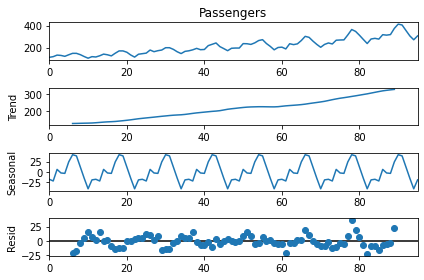

In [87]:
decompose_ts_add=seasonal_decompose(data.Passengers,period=12)
decompose_ts_add.plot()
plt.show()

# Exponential smoothing methods

In [90]:
def MAPE(pred,org):
    temp=np.abs((pred-org)/org) * 100
    return np.mean(temp)

### Simple exponential method

In [91]:
sim_model=SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.3)
preds_sim=sim_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(preds_sim,Test.Passengers)

13.641386536227884

### Holt method

In [93]:
ht_model=Holt(Train["Passengers"]).fit(smoothing_level=0.7,smoothing_slope=0.3)
pred_ht=ht_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ht,Test.Passengers)

<ipython-input-93-2dfa01d684c1>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  ht_model=Holt(Train["Passengers"]).fit(smoothing_level=0.7,smoothing_slope=0.3)


30.556429579580904

### Holt winter exp.smoothing with additive seasonality and additive trend

In [95]:
ht_model_add=ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
pred_ht_add=ht_model_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ht_add,Test.Passengers)

2.3618791109720116

### Holts winter exp.smoothing with multiplicative seasonality and additive trend

In [96]:
ht_model_mul_add=ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_ht_mul_add=ht_model_mul_add.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ht_mul_add,Test.Passengers)

1.620577358723665

## Final model

In [100]:
ht_model_add=ExponentialSmoothing(data["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit()
ht_model_add.forecast(15)

96     319.235284
97     311.528413
98     350.278738
99     346.985064
100    351.845130
101    403.925766
102    440.566807
103    427.446405
104    376.628081
105    329.767444
106    296.561252
107    341.114758
108    347.229345
109    339.522474
110    378.272799
dtype: float64

# ARIMA

In [103]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pyplot import rcParams

In [108]:
import pandas as pd
data=pd.read_excel("C:/Users/prath/Downloads/Airlines+Data.xlsx")

data['Month']=pd.to_datetime(data['Month'],infer_datetime_format=True)
indexeddata=data.set_index(['Month'])
indexeddata

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


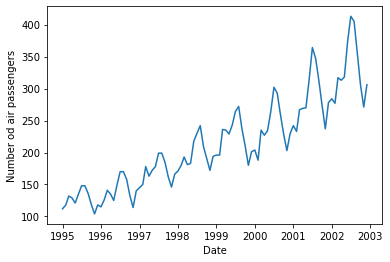

In [109]:
plt.xlabel("Date")
plt.ylabel('Number od air passengers')
plt.plot(indexeddata)

In [111]:
rolmean=indexeddata.rolling(window=12).mean()
rolstd=indexeddata.rolling(window=12).std()
print(rolmean,rolstd)

            Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01  316.833333
2002-09-01  320.416667
2002-10-01  323.083333
2002-11-01  325.916667
2002-12-01  328.250000

[96 rows x 1 columns]             Passengers
Month                 
1995-01-01         NaN
1995-02-01         NaN
1995-03-01         NaN
1995-04-01         NaN
1995-05-01         NaN
...                ...
2002-08-01   54.530781
2002-09-01   55.586883
2002-10-01   53.899668
2002-11-01   49.692616
2002-12-01   47.861780

[96 rows x 1 columns]


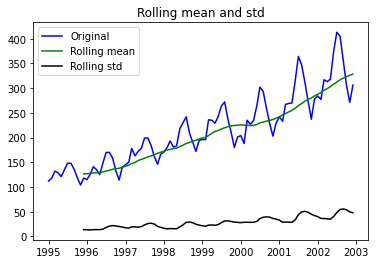

In [112]:
orig=plt.plot(indexeddata,color='blue',label='Original')
mean=plt.plot(rolmean,color='green',label='Rolling mean')
std=plt.plot(rolstd,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling mean and std')
plt.show(block=True)

In [115]:
print('Results of dickey fuller test:')
dftest=adfuller(indexeddata['Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['Test statistics','p-value','lags use','number of obeservations used'])
for key,value in dftest[4].items():
    dfoutput['Critical value(%s)' % key]=value
print(dfoutput)

Results of dickey fuller test:
Test statistics                  1.340248
p-value                          0.996825
lags use                        12.000000
number of obeservations used    83.000000
Critical value(1%)              -3.511712
Critical value(5%)              -2.897048
Critical value(10%)             -2.585713
dtype: float64


## Data transformation to achive stationary
### Log scale transformation

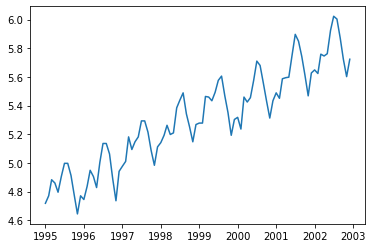

In [113]:
indexeddata_logscale=np.log(indexeddata)
plt.plot(indexeddata_logscale)

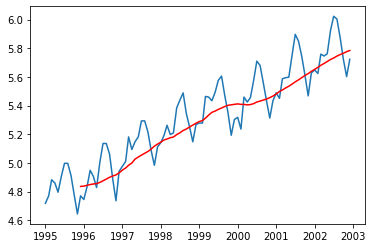

In [118]:
movingAverage = indexeddata_logscale.rolling(window=12).mean()
movingSTD = indexeddata_logscale.rolling(window=12).std()
plt.plot(indexeddata_logscale)
plt.plot(movingAverage, color='red')

In [122]:
datalogscale=indexeddata_logscale-movingAverage
datalogscale.dropna(inplace=True)
datalogscale

,Passengers
Month,
1995-12-01,-0.065494
1996-01-01,-0.093449
1996-02-01,-0.007566
1996-03-01,0.099416
1996-04-01,0.052142
...,...
2002-08-01,0.258591
2002-09-01,0.116062
2002-10-01,-0.041675


In [129]:
def test_stationary(timeseries):
    movingAverage=timeseries.rolling(window=12).mean()
    movingSTD=timeseries.rolling(window=12).std()
    
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(movingAverage,color='green',label='Rolling mean')
    std=plt.plot(movingSTD,color='black',label='Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and std')
    plt.show(block=False)
    
    print('Results of dickey fuller test:')
    dftest=adfuller(timeseries['Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','lags use','number of obseravtions used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critival value(%s)' %key]=value
    print(dfoutput)

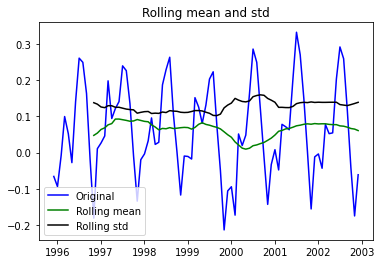

Results of dickey fuller test:
Test Statistic                 -1.910930
p-value                         0.326937
lags use                       12.000000
number of obseravtions used    72.000000
Critival value(1%)             -3.524624
Critival value(5%)             -2.902607
Critival value(10%)            -2.588679
dtype: float64


In [130]:
test_stationary(datalogscale)

### Exponential decay transformation

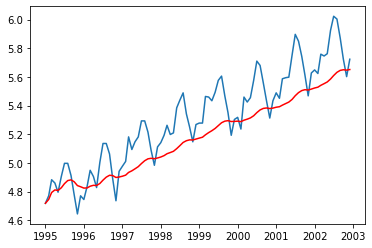

In [133]:
exp_decay_avg=indexeddata_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexeddata_logscale)
plt.plot(exp_decay_avg,color='red')

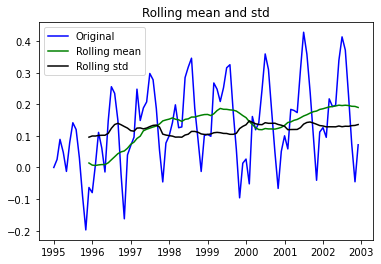

Results of dickey fuller test:
Test Statistic                 -2.835036
p-value                         0.053441
lags use                       12.000000
number of obseravtions used    83.000000
Critival value(1%)             -3.511712
Critival value(5%)             -2.897048
Critival value(10%)            -2.585713
dtype: float64


In [134]:
data_logscale_exp_avg=indexeddata_logscale - exp_decay_avg
test_stationary(data_logscale_exp_avg)

## Time shift transformation

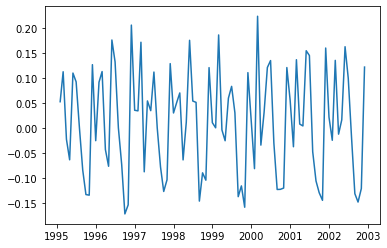

In [136]:
data_log_diffshift=indexeddata_logscale-indexeddata_logscale.shift()
plt.plot(data_log_diffshift)

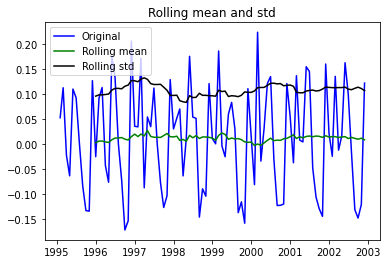

Results of dickey fuller test:
Test Statistic                 -2.670823
p-value                         0.079225
lags use                       12.000000
number of obseravtions used    82.000000
Critival value(1%)             -3.512738
Critival value(5%)             -2.897490
Critival value(10%)            -2.585949
dtype: float64


In [138]:
data_log_diffshift.dropna(inplace=True)
test_stationary(data_log_diffshift)

<ipython-input-147-dd6e445ff96d>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)
<ipython-input-147-dd6e445ff96d>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(411)


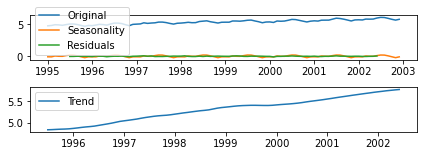

In [147]:
decomposition=seasonal_decompose(indexeddata_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexeddata_logscale,label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()

## Plotting ACF and PACF

C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


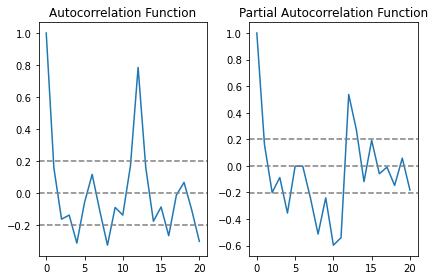

In [150]:

lag_acf=acf(data_log_diffshift,nlags=20)
lag_pacf=pacf(data_log_diffshift,nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diffshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diffshift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(data_log_diffshift)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(data_log_diffshift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()  

# Final models

C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS wi

Plotting AR model


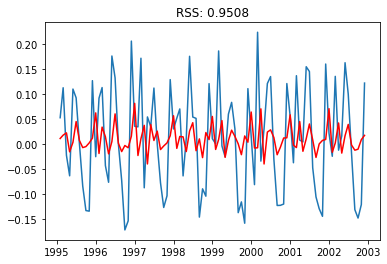

In [151]:
model = ARIMA(indexeddata_logscale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(data_log_diffshift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - data_log_diffshift['Passengers'])**2))
print('Plotting AR model')

C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting MA model


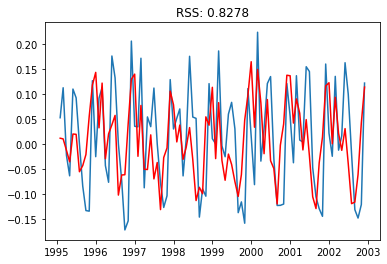

In [153]:
model = ARIMA(indexeddata_logscale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(data_log_diffshift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - data_log_diffshift['Passengers'])**2))
print('Plotting MA model')

C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Plotting ARIMA model


C:\Users\prath\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


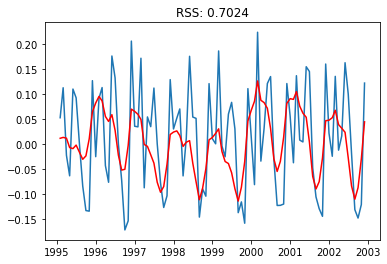

In [154]:
model = ARIMA(indexeddata_logscale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(data_log_diffshift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - data_log_diffshift['Passengers'])**2))
print('Plotting ARIMA model')

## Prediction and reverse transformation

In [157]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff)

Month
1995-02-01    0.011035
1995-03-01    0.012803
1995-04-01    0.011279
1995-05-01   -0.007585
1995-06-01   -0.009599
                ...   
2002-08-01   -0.084339
2002-09-01   -0.110806
2002-10-01   -0.087913
2002-11-01   -0.030033
2002-12-01    0.043952
Length: 95, dtype: float64


In [158]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Month
1995-02-01    0.011035
1995-03-01    0.023838
1995-04-01    0.035117
1995-05-01    0.027531
1995-06-01    0.017932
                ...   
2002-08-01    0.506685
2002-09-01    0.395878
2002-10-01    0.307965
2002-11-01    0.277932
2002-12-01    0.321883
Length: 95, dtype: float64


In [159]:
predictions_ARIMA_log = pd.Series(indexeddata_logscale['Passengers'].iloc[0], index=indexeddata_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log

Month
1995-01-01    4.718499
1995-02-01    4.729534
1995-03-01    4.742336
1995-04-01    4.753615
1995-05-01    4.746030
                ...   
2002-08-01    5.225183
2002-09-01    5.114377
2002-10-01    5.026464
2002-11-01    4.996431
2002-12-01    5.040382
Length: 96, dtype: float64

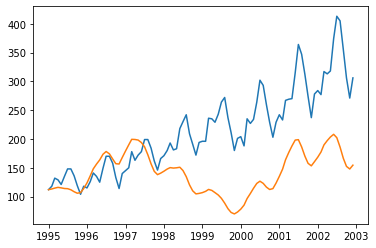

In [161]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexeddata)
plt.plot(predictions_ARIMA)

In [163]:
indexeddata_logscale

,Passengers
Month,
1995-01-01,4.718499
1995-02-01,4.770685
1995-03-01,4.882802
1995-04-01,4.859812
1995-05-01,4.795791
...,...
2002-08-01,6.003887
2002-09-01,5.872118
2002-10-01,5.723585


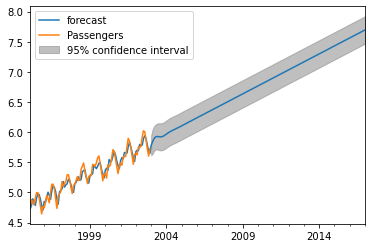

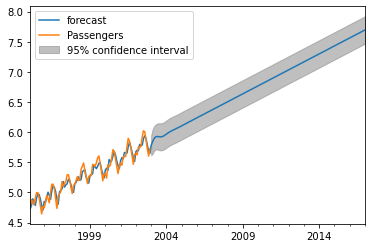

In [164]:
results_ARIMA.plot_predict(1,264)